# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Lý Anh Quân
- MSSV: 22127344
- Lớp: 22CLC05

# Import

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [146]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng cách khác nếu cần

# Cài đặt hàm

In [147]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.pinv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w   # Equivalent to np.dot(X, self.w). But why?
        #return np.sum(self.w.ravel() * X, axis=1)
        # Chuyển đổi self.w và X sang mảng NumPy nếu cần thiết
        # w = self.w.to_numpy() if isinstance(self.w, pd.Series) else self.w
        # X = X.to_numpy() if isinstance(X, pd.DataFrame) else X

        # return np.dot(X, w)

def preprocess(x):
    ''' 
    This function is used to preprocess the data. It adds a column of ones to the input data and squares the input data.

    Parameters
    ----------
    x : np.array
        Input data

    Returns
    -------
    X : np.array
        Preprocessed input data
    '''
    X = np.hstack((np.ones((x.shape[0], 1)), x))

    return X

def calculate_mae(y, y_hat):
    ''' 
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Mean absolute error
    '''
   
    return np.mean(np.abs(np.array(y).ravel() - np.array(y_hat).ravel()))   


class k_folds_cross_validation:
    def __init__(self, k: int, features: list, models: list, data):
        self.k = k
        self.models = models
        self.data = data.loc[:, features]
        
    def shuffle_data(self):
        #Xáo trộn dữ liệu trước khi split
        # cố định seed trước khi shuffle
        np.random.seed(42)
        # thực hiện shuffle data
        data_arr = self.data.values
        np.random.shuffle(data_arr)
        self.data_shuffled = pd.DataFrame(data_arr, columns=self.data.columns)
        
    def split_to_k_folds(self):
        #Chia dữ liệu đã được xáo trộn thành k fold bằng nhau
        rows = self.data_shuffled.shape[0]
        self.folds = [self.data_shuffled[i*(rows//self.k): (i+1)*(rows//self.k)] for i in range(self.k)]
        
    def cross_validation(self):
        """Thực hiện cross validation"""
        self.maes_list = []
        for fold in self.folds:
            mae_for_each_model = []
            for model in self.models:
                X_train = fold.loc[:, model].to_numpy().reshape(-1, len(model))
                y_train = fold.iloc[:, -1]

                X_train_pre = preprocess(X_train)

                current_model = OLSLinearRegression().fit(X_train_pre, y_train)
                
                X_test = fold.loc[:, model].to_numpy().reshape(-1, len(model))
                X_test_pre = preprocess(X_test)

                y_pred = current_model.predict(X_test_pre)
                
                current_mae = calculate_mae(y=y_train, y_hat=y_pred)
                mae_for_each_model.append(current_mae)
               
            self.maes_list.append(mae_for_each_model)
        # Tính giá trị mae trung bình của mỗi mô hình sau khi được huấn luyện trên k fold
        self.maes_list = np.mean(np.array(self.maes_list), axis=0)  
        
    def best_model(self):
        """Trả về mảng giá trị mae trung bình sau khi thực hiện k-fold cross validation và mô hình có giá trị mae
        trung bình nhỏ nhất"""
        return self.maes_list, np.argmin(self.maes_list)  


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

In [148]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,77,0,5,2,69.0
1,8,90,1,4,1,84.0
2,9,83,1,6,3,82.0
3,4,52,0,9,5,38.0
4,4,82,1,8,6,68.0


In [149]:
train.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4.976444,69.396111,0.493667,6.535556,4.590889,55.136333
std,2.594647,17.369957,0.499988,1.695533,2.864570,19.187669
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [150]:
train["Extracurricular Activities"].value_counts()

Extracurricular Activities
0    4557
1    4443
Name: count, dtype: int64

In [151]:
train.groupby("Extracurricular Activities")["Performance Index"].mean()

Extracurricular Activities
0    54.650647
1    55.634481
Name: Performance Index, dtype: float64

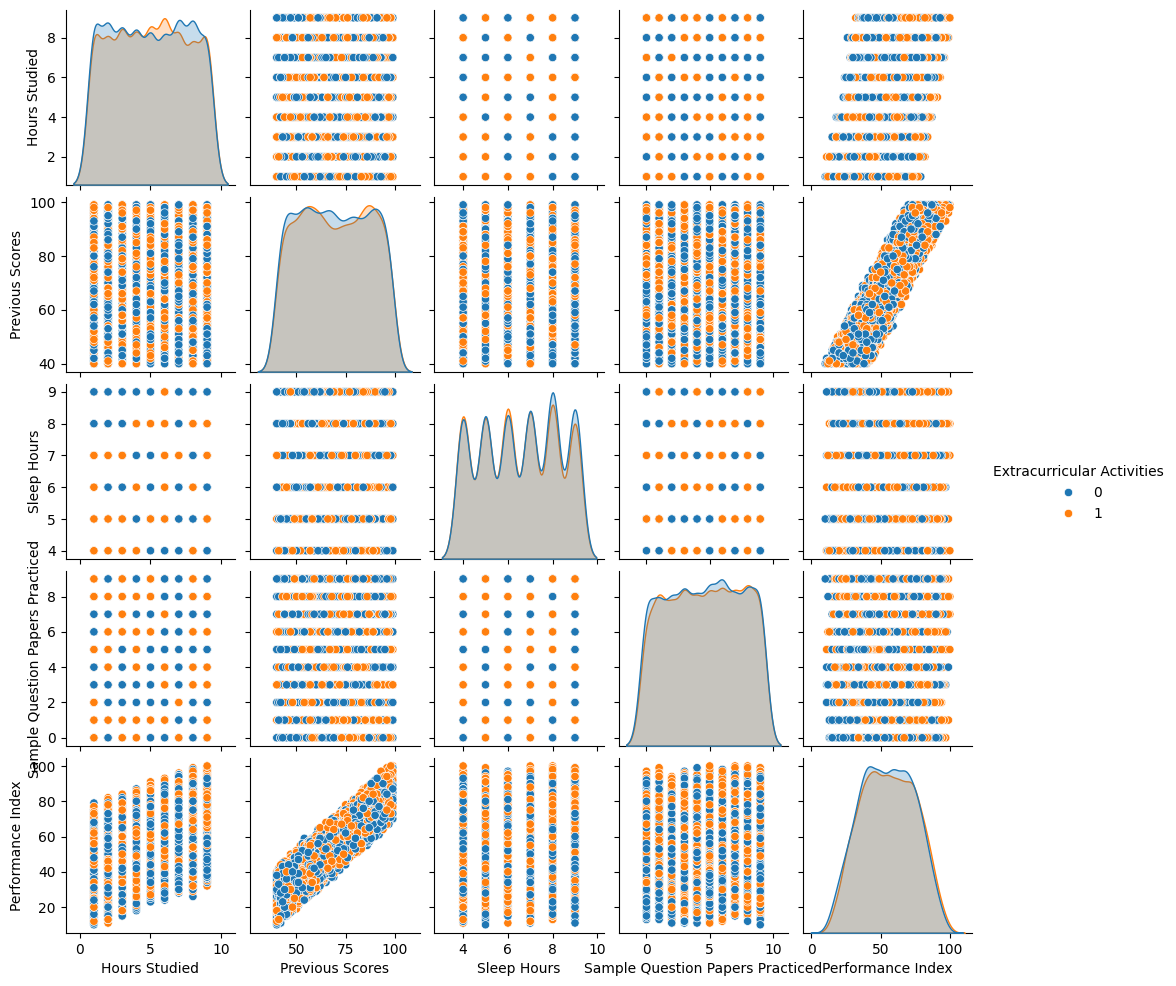

In [152]:
sns.pairplot(data = train, hue = "Extracurricular Activities", height=2)
plt.show()

In [153]:
significance_level = 0.05
data_extracurricular = train[train["Extracurricular Activities"]==1]["Performance Index"].values

data_not_extracurricular = train[train["Extracurricular Activities"]==0]["Performance Index"].values


np.var(data_extracurricular), np.var(data_not_extracurricular)

(370.21796026990336, 365.60803831255225)

In [154]:
from scipy import stats
result = stats.ttest_ind(a = data_extracurricular, 
                         b = data_not_extracurricular, 
                         equal_var=False, 
                         alternative = "greater")
pvalue = result.pvalue
print(f'p-value = {pvalue}\n')

if pvalue < significance_level:
    print(f'If the p-value {pvalue} is less than 0.05, then reject the null hypothesis')
else:
    print(f'If the p-value {pvalue} is greater than 0.05, then failed to reject the Null hypothesis')

p-value = 0.007508665475760223

If the p-value 0.007508665475760223 is less than 0.05, then reject the null hypothesis


In [155]:
# Identify the variable that has the highest relationship
train.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.018463,0.004511,-0.000694,0.015852,0.369148
Previous Scores,-0.018463,1.000000,0.009533,0.002802,0.006417,0.914775
Extracurricular Activities,0.004511,0.009533,1.000000,-0.020773,0.008199,0.025637
Sleep Hours,-0.000694,0.002802,-0.020773,1.000000,0.005054,0.043980
Sample Question Papers Practiced,0.015852,0.006417,0.008199,0.005054,1.000000,0.041088
Performance Index,0.369148,0.914775,0.025637,0.043980,0.041088,1.000000


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

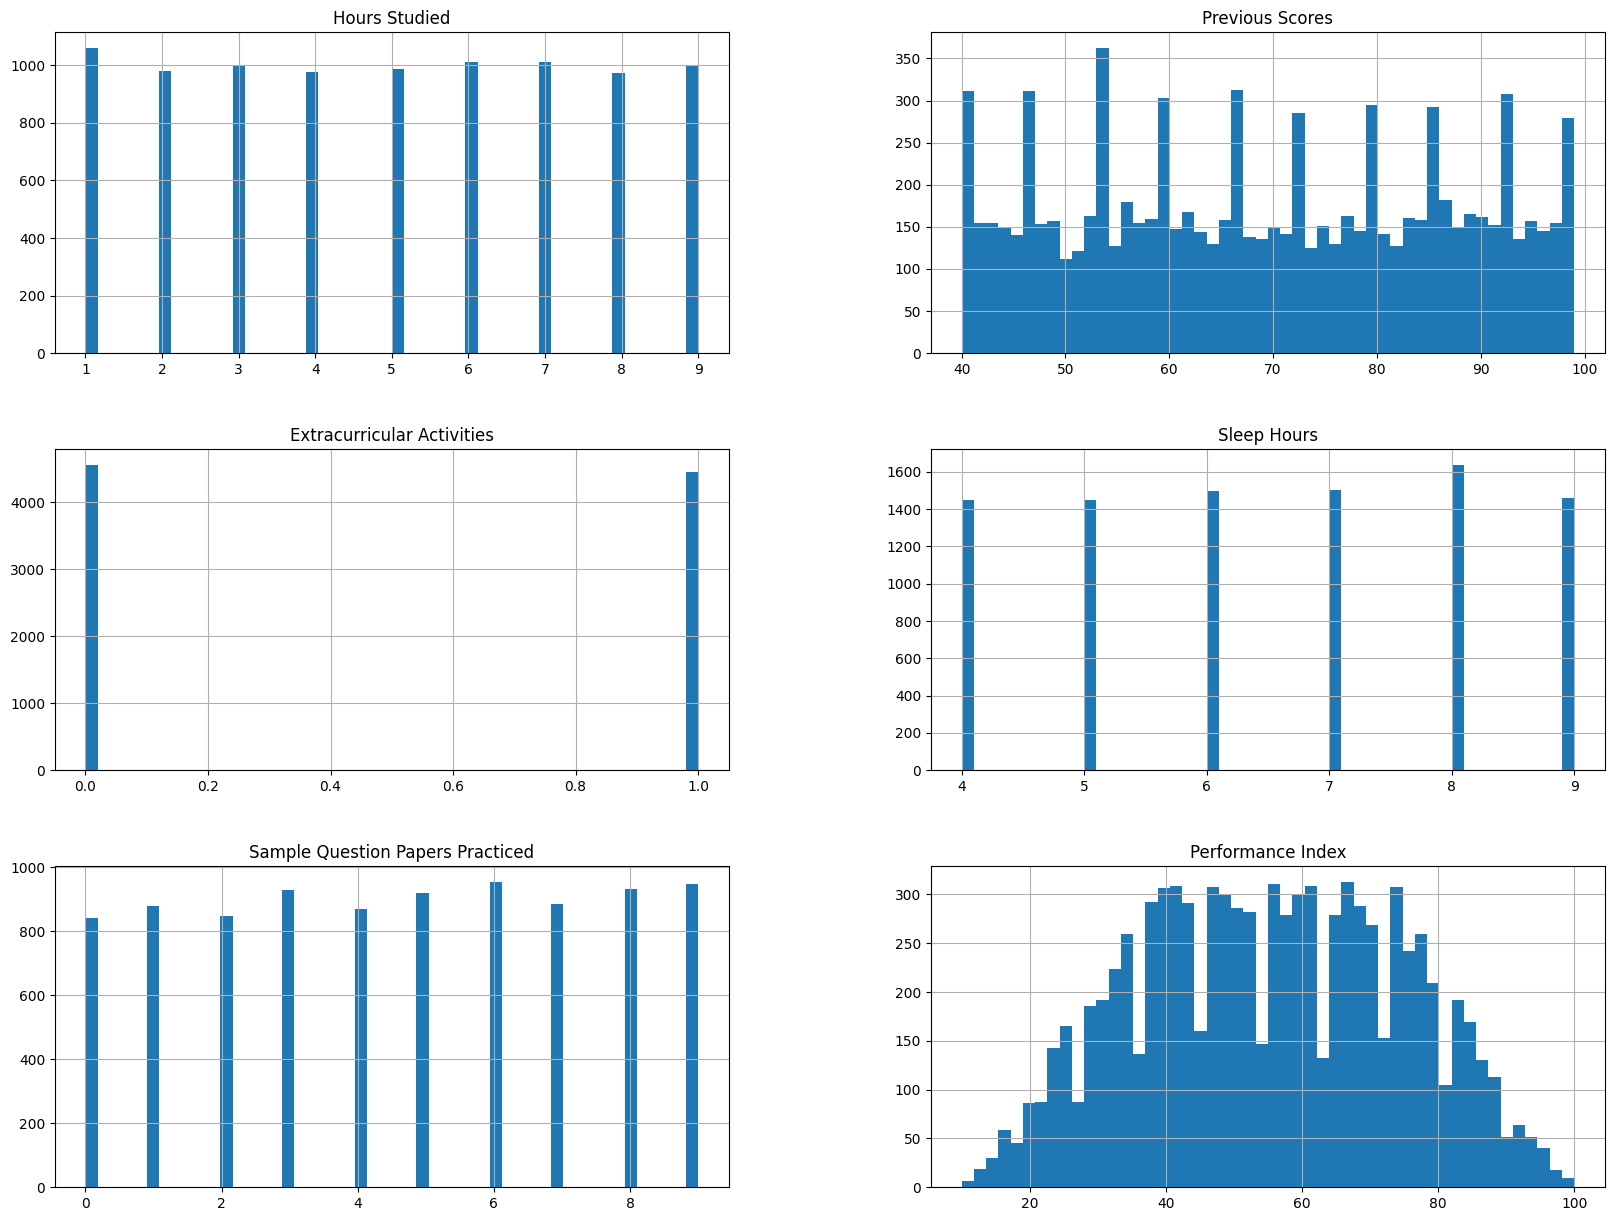

In [156]:
train.hist(bins=50, figsize=(20, 15))


Hours Studied:



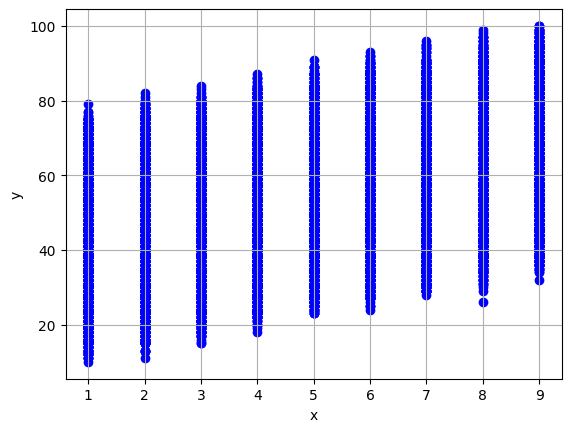


Previous Scores:



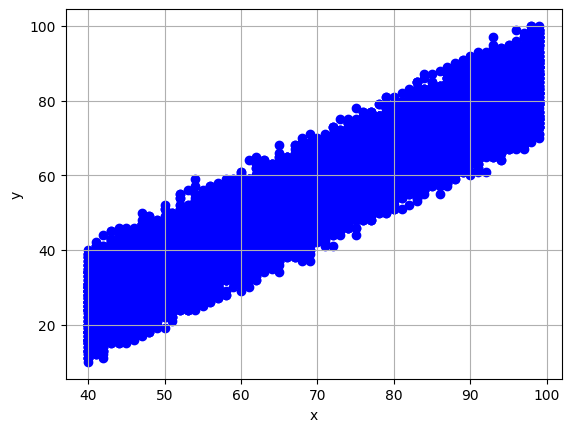


Extracurricular Activities:



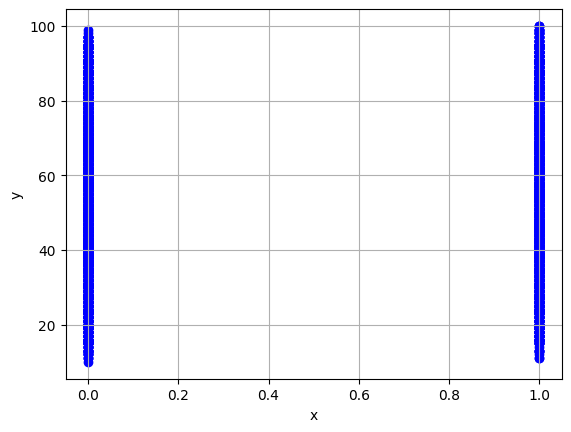


Sleep Hours:



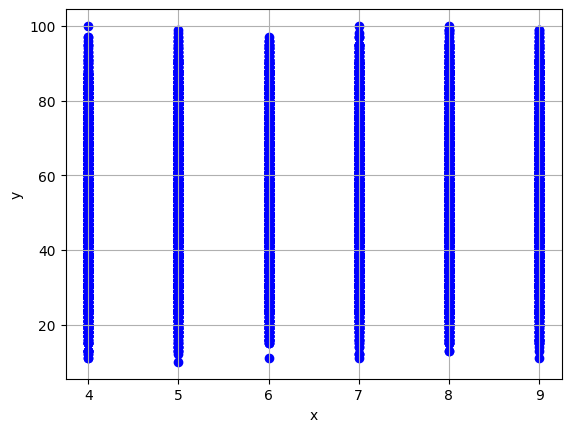


Sample Question Papers Practiced:



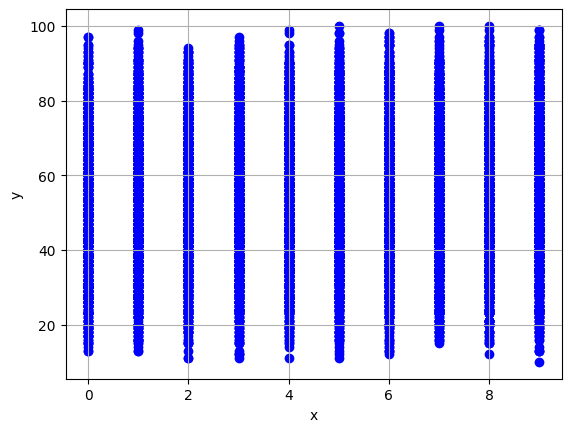

In [157]:
def plot_data(x, y):
	plt.scatter(x, y, color='b', marker='o')
	plt.xlabel('x')
	plt.ylabel('y')
	plt.grid()
	plt.show()

for i in range(5):
	X_train_np = X_train.to_numpy()
	y_train_np = y_train.to_numpy()
	headerName = X_train.columns
	X, y = X_train_np[:, i].reshape(-1,1), y_train_np.reshape(-1,1)
	print(f'\n{headerName[i]}:\n')
	plot_data(X, y)

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [158]:
# Phần code cho yêu cầu 2a
features_2a = ['w0','Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced' ]

X_train_pre = preprocess(X_train)
x_test_pre = preprocess(X_test)


#model cho 5 đặc trưng
features_model = OLSLinearRegression().fit(X_train_pre, y_train)

# In ra các hệ số tương ứng vừa huấn luyện được cho từng feature
params_2a = features_model.get_params()
#round to three
params_2a = np.round(params_2a, 3)
for i in range(len(params_2a)):
    print(f"{features_2a[i]}: {params_2a[i]}")

# Tính giá trị dự đoán của tập kiểm tra dựa theo mô hình vừa có được
y_pred_2a = features_model.predict(x_test_pre)

w0: -33.969
Hours Studied: 2.852
Previous Scores: 1.018
Extracurricular Activities: 0.604
Sleep Hours: 0.474
Sample Question Papers Practiced: 0.192


In [159]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mae_2a = calculate_mae(y = y_test, y_hat = y_pred_2a)
print(f"MAE on test set: {mae_2a}")


MAE on test set: 1.5956486884761498


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + 2.852 \times \text{Hour Studied} + 1.018 \times \text{Previous Scores}\\ + 0.604 \times \text{Extracurricular Activities} + 0.474 \times \text{Sleep Hours}\\ + 0.192 \times \text{Question Paper} $$



Độ lỗi tuyệt đối trung bình MAE trên tập kiểm tra của mô hình ở câu 2a (làm tròn đến 3 chữ số thập phân):

$$\text{MAE} = 1.596$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng. 

Bước 1: Shuffle dữ liệu (shuffle, xtrain, ytrain) => Tạo thành 1 dataset F có k = 5 fold. (dùng indexing)

Bước 2: Find best feature: Lần lượt lặp qua các feature (for feature in features):

Cho mỗi feature đi qua từng cái F (đã được chia ra 5 phần)

X_test[i], y_test[i] = F[i]

X_train[i], y_train[i] = F\F[i] (nếu i là 1 thì F còn 5,4,3,2)

lr[i] = OLSLinearRegression(x_train_pre[i], y_train[i])

y^_test[i] = lr[i].predict(X_test_pre[i])

MAE[i] = MAE(y^_test[i], y_test[i])

Bước 3: Show ra các mae và chọn mae nhỏ nhất

In [160]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
features_2b = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
models_2b = [['Hours Studied'], ['Previous Scores'], ['Extracurricular Activities'], ['Sleep Hours'], ['Sample Question Papers Practiced']]
kfcv_er_2b = k_folds_cross_validation(k=5, features=features_2b, models=models_2b, data=train)
kfcv_er_2b.shuffle_data()
kfcv_er_2b.split_to_k_folds()
kfcv_er_2b.cross_validation()
avg_mae_of_each_model, index_best_feature = kfcv_er_2b.best_model()
for i in range(avg_mae_of_each_model.shape[0]):
    print(f"Mae cho mô hình với đặc trưng {features_2b[i]} từ k-fold CV (lấy trung bình): {avg_mae_of_each_model[i]}")
print(f"Mô hình tốt nhất là mô hình với feature: {features_2b[index_best_feature]}")


Mae cho mô hình với đặc trưng Hours Studied từ k-fold CV (lấy trung bình): 15.44434439569278
Mae cho mô hình với đặc trưng Previous Scores từ k-fold CV (lấy trung bình): 6.616729746001755
Mae cho mô hình với đặc trưng Extracurricular Activities từ k-fold CV (lấy trung bình): 16.180989432194316
Mae cho mô hình với đặc trưng Sleep Hours từ k-fold CV (lấy trung bình): 16.17673818155007
Mae cho mô hình với đặc trưng Sample Question Papers Practiced từ k-fold CV (lấy trung bình): 16.1655501296732
Mô hình tốt nhất là mô hình với feature: Previous Scores


- Báo cáo **5 kết quả (mae) tương ứng cho 5 mô hình** từ k-fold Cross Validation (lấy trung bình)
<center>

| STT | Mô hình với 1 đặc trưng |   MAE    |
|:---:|:-----------------------:|:--------:|
|  1  | Hours Studied			      							|15.444|
|  **2**  | **Previous Scores**          			|**6.617**|
|  3  | Extracurricular Activities            |16.181|
|  4  | Sleep Hours             							|16.177|
|  5  | Sample Question Papers Practiced  		|16.166|

</center>

In [161]:
#Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_2b = train.loc[:, features_2b[index_best_feature]].to_numpy().reshape(-1, 1)
X_train_2b_pre = preprocess(X_train_2b)
y_train_2b = train.iloc[:, -1]

X_test_2b = test.loc[:, features_2b[index_best_feature]].to_numpy().reshape(-1, 1)
X_test_pre = preprocess(X_test_2b)
y_test_2b = test.iloc[:, -1]

# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_personality_feature_model = OLSLinearRegression().fit(X_train_2b_pre, y_train_2b)


# In ra các hệ số tương ứng vừa huấn luyện được cho từng feature
params_2b = best_personality_feature_model.get_params()
print(f"Intercep: {params_2b[0]}\n{features_2b[index_best_feature]}: {params_2b[1]}")
# Tính giá trị dự đoán của tập kiểm tra dựa theo mô hình vừa có được
y_pred_2b = best_personality_feature_model.predict(X_test_pre)

Intercep: -14.988645779315936
Previous Scores: 1.0105030093166434


In [162]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
# from sklearn.metrics import mean_absolute_error
# mae_2b = mean_absolute_error(y_true=y_test_2b, y_pred=y_pred_2b)

mae_2b = calculate_mae(y=y_test_2b, y_hat=y_pred_2b)
print("Độ lỗi tuyệt đối trung bình (MAE - Mean Absolute Error) của mô hình ở câu 2b: ", mae_2b)

Độ lỗi tuyệt đối trung bình (MAE - Mean Absolute Error) của mô hình ở câu 2b:  6.544277293452627


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + 1.011 \times Previous Scrores$$

Độ lỗi tuyệt đối trung bình MAE trên tập kiểm tra của mô hình tốt nhất ở câu 2b:
$$\text{MAE} = 6.544$$


# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

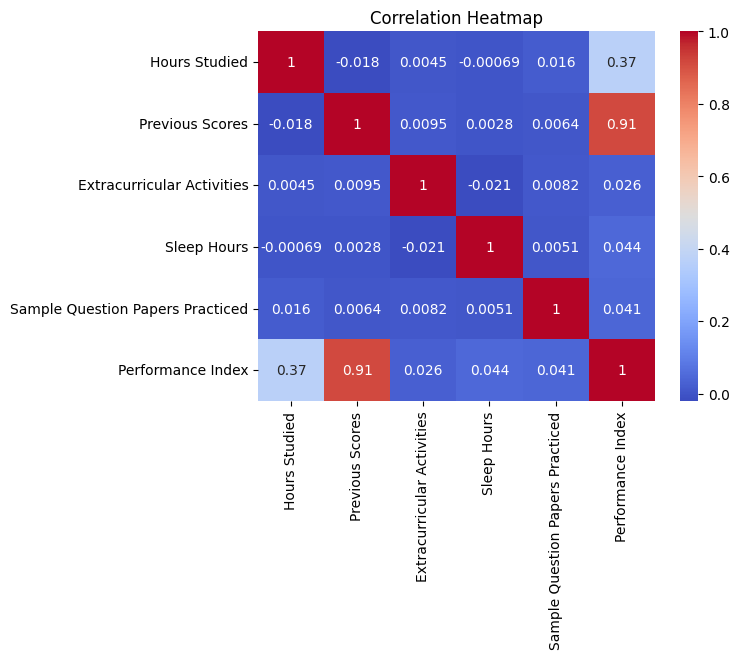

In [163]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
# Biểu đồ tương quan giữa các đặc trưng
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

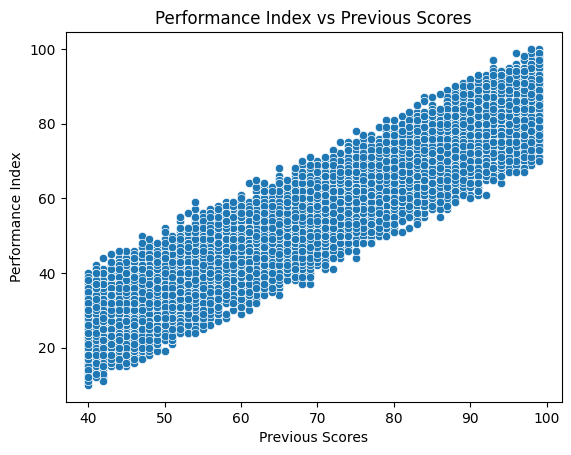

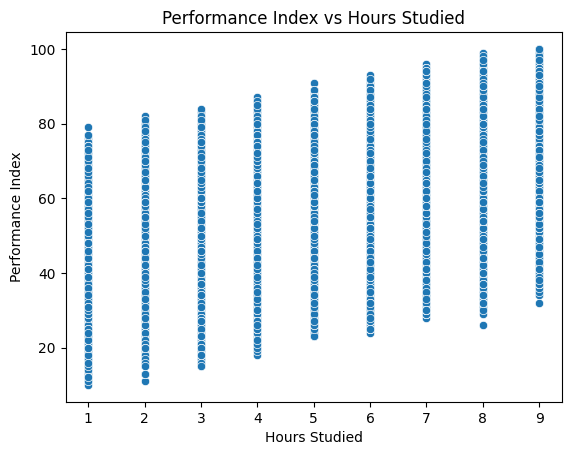

In [164]:
#Biểu đồ phân tán scatter plot giúp kiểm tra mqh giữa 2 đặc trưng 
# Biểu đồ phân tán giữa 'Previous Scores' và Performance Index
sns.scatterplot(x='Previous Scores', y='Performance Index', data=train)
plt.title('Performance Index vs Previous Scores')
plt.show()

sns.scatterplot(x='Hours Studied', y='Performance Index', data=train)
plt.title('Performance Index vs Hours Studied')
plt.show()



## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [165]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
# Trình bày các phần tìm ra mô hình 
#làm tròn số
import math 
def modified_k_foldCrossValidation(dataset, k = 5):
    foldSize = math.ceil(dataset.shape[0] / k)
    #xáo trộn dữ liệu
    shuffledDataset = dataset.sample(frac = 1)

    #chia dataset thành k fold
    folds = []
    for i in range(k):
        folds.append(shuffledDataset.iloc[i * foldSize : i * foldSize + foldSize])
    
    mae_list = []
    #duyệt lần lượt từng fold
    for current in range(len(folds)):
        #fold hiện tại dùng để test
        fold_X_test = folds[current].iloc[:, :-1].to_numpy()
        fold_y_test = folds[current].iloc[:, -1].to_frame().to_numpy()

        #ghép các folds còn lại thành train dataset
        otherFolds = []
        for other in range(len(folds)):
            if other != current:
                otherFolds.append(folds[other])
        otherFolds = pd.concat([f for f in otherFolds])

        fold_X_train = otherFolds.iloc[:, :-1].to_numpy()
        fold_y_train = otherFolds.iloc[:, -1].to_frame().to_numpy()

        #preprocess dữ liệu
        fold_X_train = preprocess(fold_X_train)
        fold_X_test = preprocess(fold_X_test)
        fold_lr = OLSLinearRegression().fit(preprocess(fold_X_train), fold_y_train)
        fold_pred = fold_lr.predict(preprocess(fold_X_test))

        mae_list.append(calculate_mae(fold_y_test, fold_pred))

        #hủy mô hình 
        fold_lr = 0

    return np.mean(mae_list, axis = 0)
	
print("Độ lỗi trung bình của các mô hình khi sử dụng k-fold Cross Validation:")
result_2c = []
hour_studied_col = train[['Hours Studied']]
previous_scores_col = train[['Previous Scores']]
sleep_hours_col = train[['Sleep Hours']]
Extracurricular_Activities_col = train[['Extracurricular Activities']]
sample_question_papers_practiced_col = train[['Sample Question Papers Practiced']]

#square root of previous scores
previous_scores_col_root = previous_scores_col ** 0.5
hour_studied_col_root = hour_studied_col ** 0.5
train_Performance_col = train[['Performance Index']]

dataset_2c_1 = train[['Hours Studied', 'Previous Scores','Performance Index']]
result_2c.append(["Mô hình 1", modified_k_foldCrossValidation(dataset_2c_1, 5)])

dataset_2c_2 = pd.concat((hour_studied_col, previous_scores_col**2,sleep_hours_col,Extracurricular_Activities_col, train_Performance_col), axis = 1)
result_2c.append(["Mô hình 2", modified_k_foldCrossValidation(dataset_2c_2, 5)])

dataset_2c_3 = pd.concat((hour_studied_col_root, previous_scores_col_root,sleep_hours_col,Extracurricular_Activities_col,train_Performance_col), axis = 1)
result_2c.append(["Mô hình 3", modified_k_foldCrossValidation(dataset_2c_3, 5)])

print("MAE trung bình của từng mô hình:")
for i in range(len(result_2c)):
    print(result_2c[i][0], ":", result_2c[i][1])

min = 0
for j in range(len(result_2c)):
    if result_2c[j][1] < result_2c[min][1]:
        min = j
print("Mô hình tốt nhất là:", result_2c[min][0])


Độ lỗi trung bình của các mô hình khi sử dụng k-fold Cross Validation:
MAE trung bình của từng mô hình:
Mô hình 1 : 1.8162408769804543
Mô hình 2 : 2.3191667289029043
Mô hình 3 : 2.0638193369493125
Mô hình tốt nhất là: Mô hình 1


In [166]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
features_2c = ['w0', 'Hours Studied', 'Previous Scores']
x_train_2c = train[['Hours Studied', 'Previous Scores']]
X_train_2c_pre = preprocess(x_train_2c)
X_test_2c = test[['Hours Studied', 'Previous Scores']]
X_test_pre = preprocess(X_test_2c)
lr_2c = OLSLinearRegression().fit(X_train_2c_pre, y_train)
params_2c = lr_2c.get_params()
params_2c = np.round(params_2c, 3)
y_pred_2c = lr_2c.predict(X_test_pre)
for i in range(len(params_2c)):
    print(f"{features_2c[i]}: {params_2c[i]}")



w0: -29.747
Hours Studied: 2.856
Previous Scores: 1.018


In [167]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
mae_2c = calculate_mae(y_test, y_pred_2c)
print(f"MAE on test set: {mae_2c}")


MAE on test set: 1.839436397652971


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\textbf{Student Performance} = -29.747 + 2.856\times \textbf{Hour Studied} + 1.018\times \textbf{Previous Scores}$$

$$\textbf{MAE} = 1.839$$